In [1]:
import os; os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
from tqdm.auto import tqdm

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
# import plotly.express as px
from tensorflow.keras import layers
from pickle import dump, load
from pathlib import Path
import plotly.figure_factory as ff
from scipy.spatial import Delaunay
import plotly.graph_objects as go
import plotly.offline as pyo
import os

In [3]:
(Xtrain, Ytrain), (Xtest, Ytest) = tf.keras.datasets.mnist.load_data()
Xtrain = Xtrain / 255
Xtest = Xtest / 255
Xtrain = np.expand_dims(Xtrain,-1)
Xtest = np.expand_dims(Xtest,-1)

dst_train_o = tf.data.Dataset.from_tensor_slices((Xtrain, Ytrain))
dst_test_o = tf.data.Dataset.from_tensor_slices((Xtest, Ytest))

2023-03-13 17:52:37.525724: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-03-13 17:52:37.525794: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: mlui01.ific.uv.es
2023-03-13 17:52:37.525813: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: mlui01.ific.uv.es
2023-03-13 17:52:37.525958: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 525.85.12
2023-03-13 17:52:37.526011: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 525.85.12
2023-03-13 17:52:37.526024: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 525.85.12
2023-03-13 17:52:37.526744: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following

In [4]:
big_shape = (56,56)

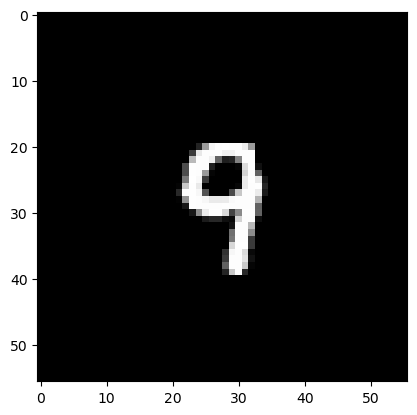

In [5]:
Xtrain_big = np.zeros((Xtrain.shape[0],*big_shape,1))
Xtrain_big[:,14:14+28,14:14+28] = Xtrain[:,:,:]

Xtest_big = np.zeros((Xtest.shape[0],*big_shape,1))
Xtest_big[:,14:14+28,14:14+28] = Xtest[:,:,:]

plt.imshow(Xtrain_big[520].squeeze(), cmap = "gray")
plt.show()

In [6]:
dst_train = tf.data.Dataset.from_tensor_slices((Xtrain_big, Ytrain))
dst_test = tf.data.Dataset.from_tensor_slices((Xtest_big, Ytest))

In [7]:
for x, y in dst_train.batch(32):
    break
x.shape, y.shape

2023-03-13 17:52:42.685185: W tensorflow/core/data/root_dataset.cc:247] Optimization loop failed: CANCELLED: Operation was cancelled


(TensorShape([32, 56, 56, 1]), TensorShape([32]))

In [8]:
clasificador = tf.keras.models.Sequential([
    layers.Conv2D(32, (3,3), activation = "relu", padding = "same" ,input_shape = Xtrain_big[0].shape),#56x56
    layers.Flatten(),
    layers.Dense(10, activation  = "softmax")
])



In [9]:
clasificador.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = clasificador.fit(dst_train.batch(128), epochs=1, validation_data = dst_test.batch(256))

469/469 [==============================] - 18s 29ms/step - loss: 0.2789 - accuracy: 0.9229 - val_loss: 0.1146 - val_accuracy: 0.9684


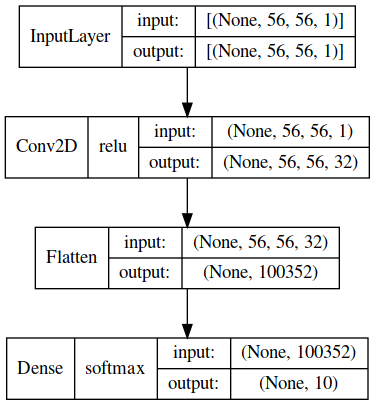

In [75]:
tf.keras.utils.plot_model(
    clasificador,
    #to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)

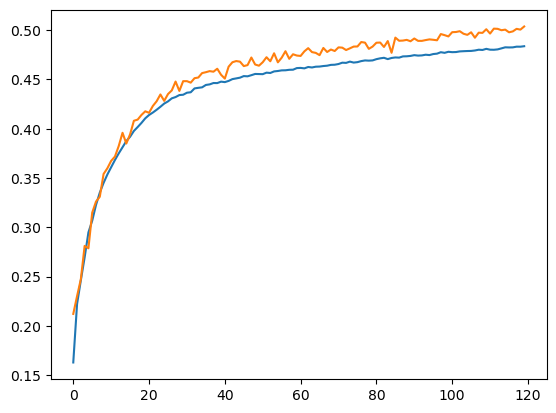

In [40]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

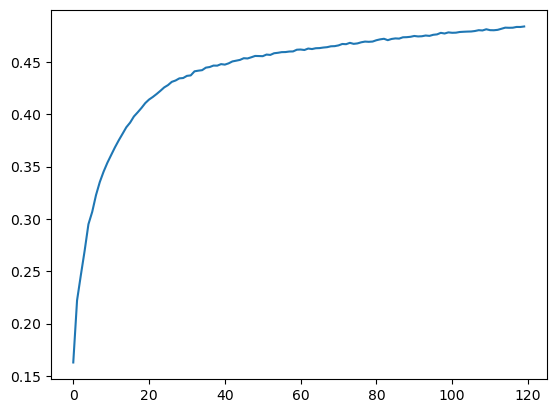

In [38]:
plt.plot(history.history["accuracy"])

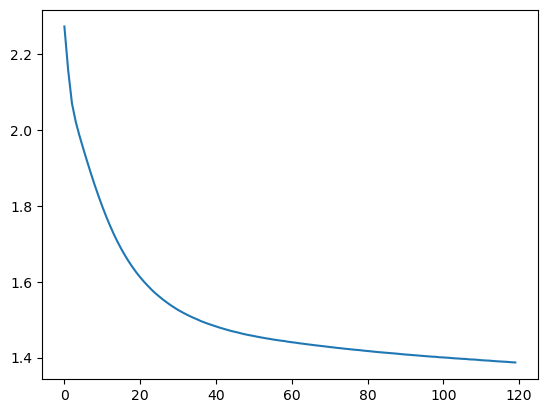

In [27]:
plt.plot(history.history["loss"])

In [10]:
# Guardar el Modelo
#clasificador.save('clasificador_lit.h5')

# Recrea exactamente el mismo modelo solo desde el archivo
clasificador = tf.keras.models.load_model('clasificador_inv_basico.h5')

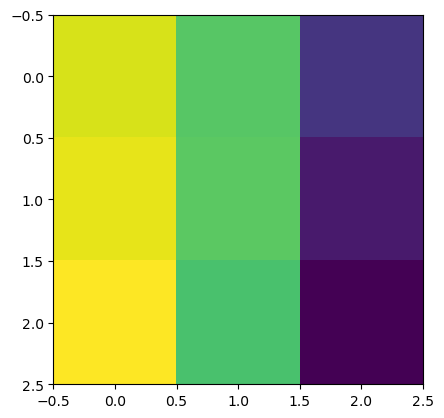

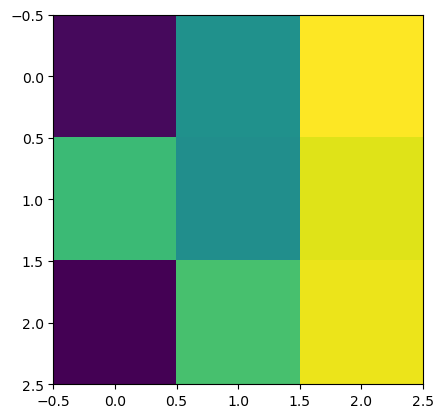

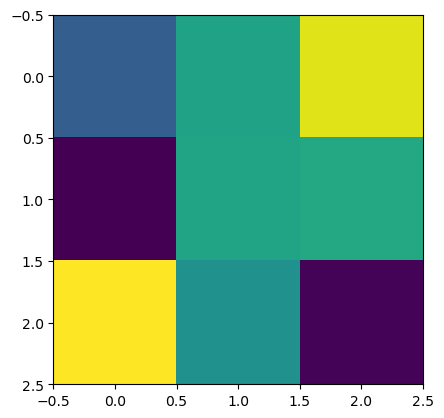

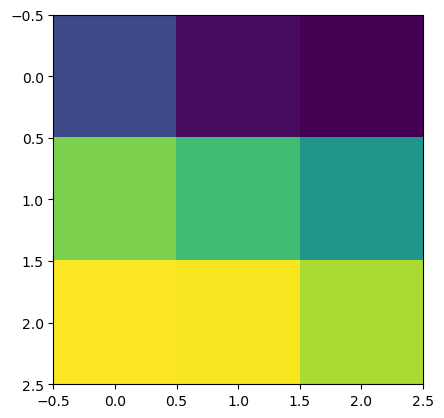

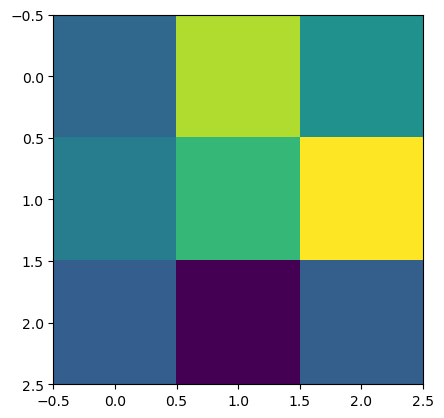

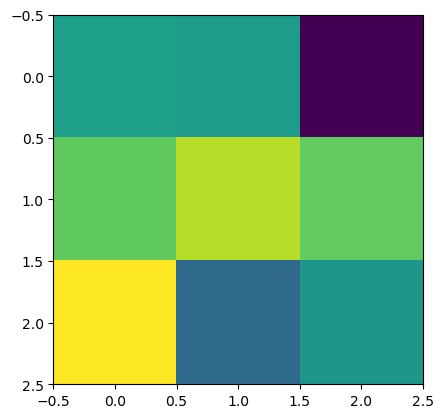

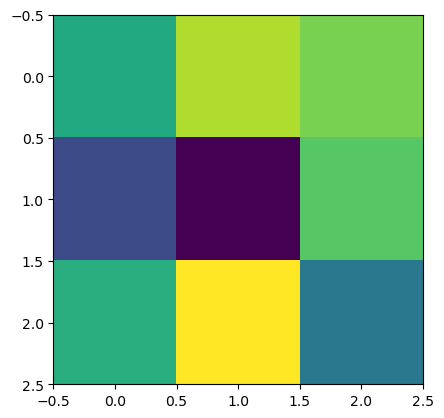

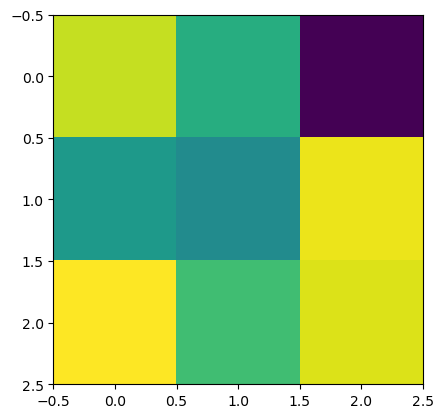

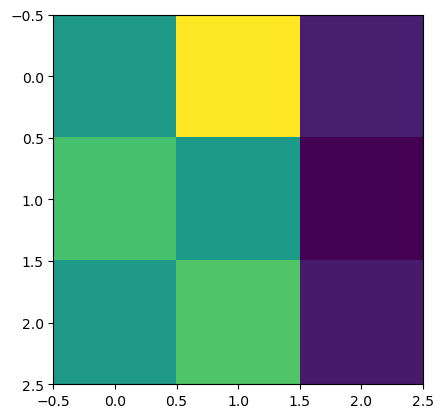

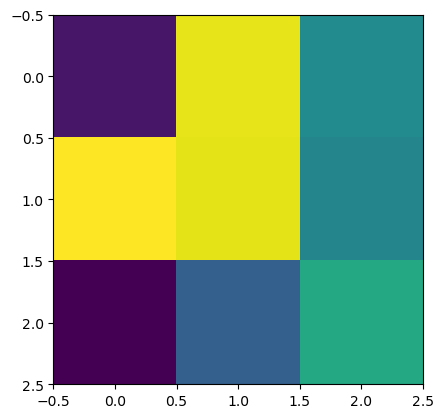

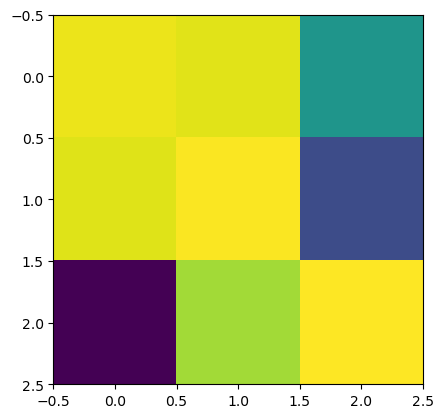

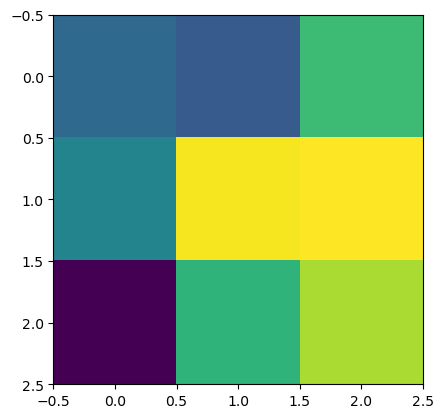

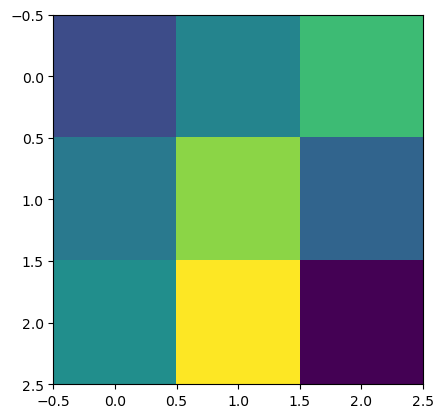

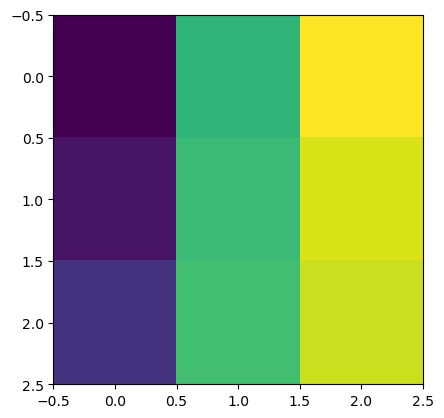

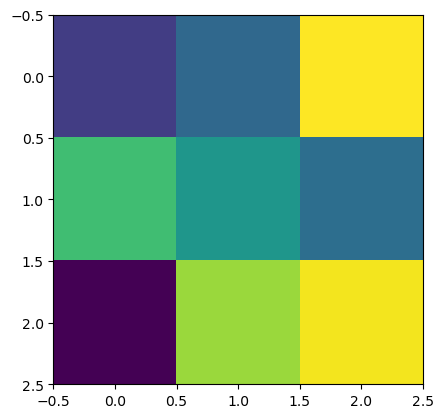

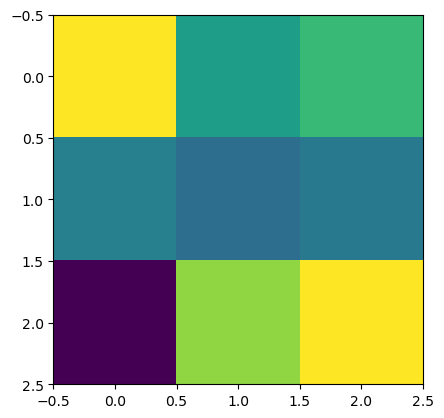

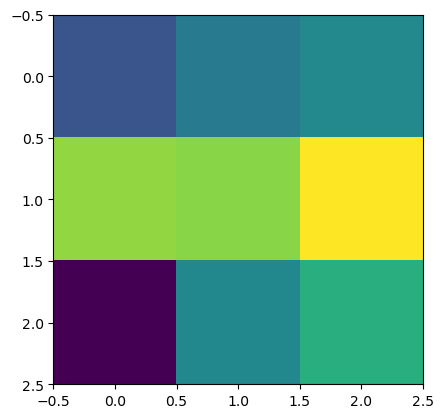

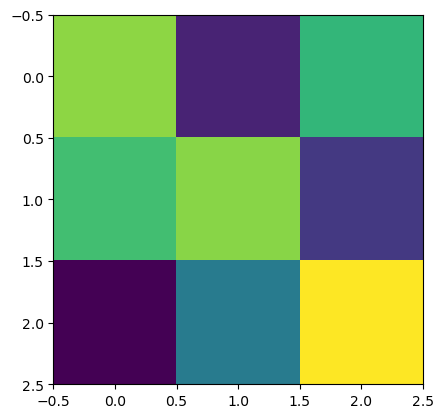

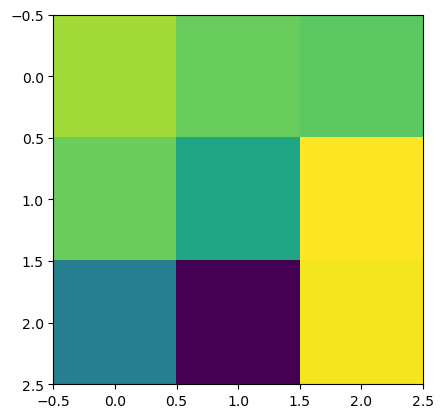

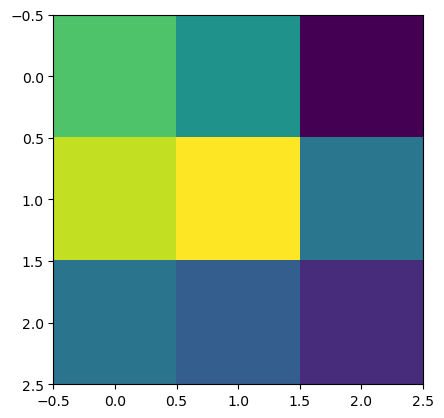

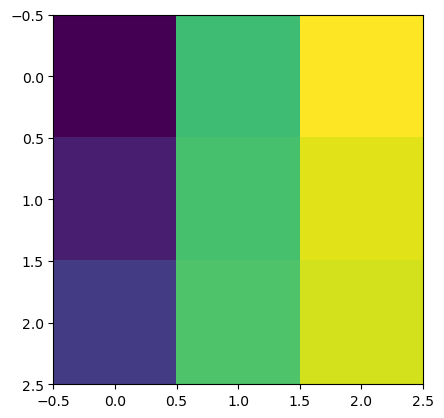

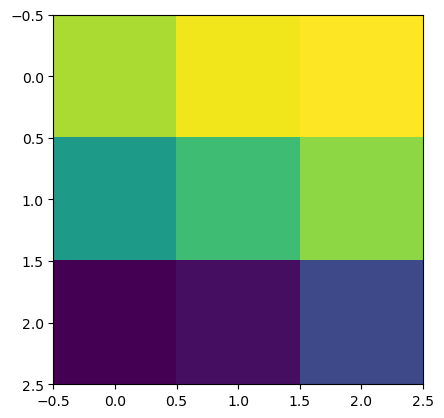

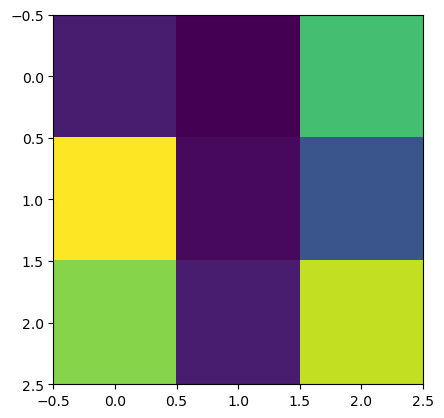

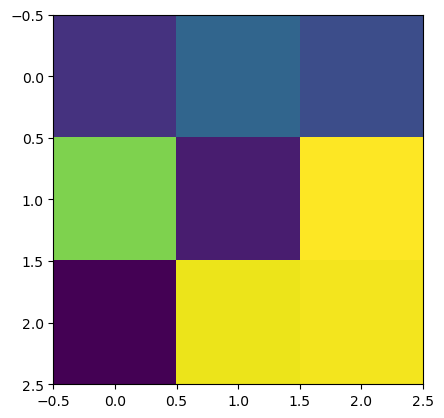

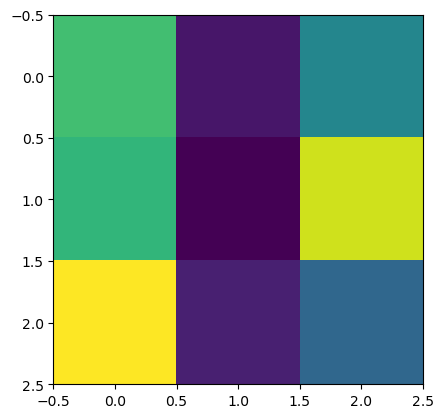

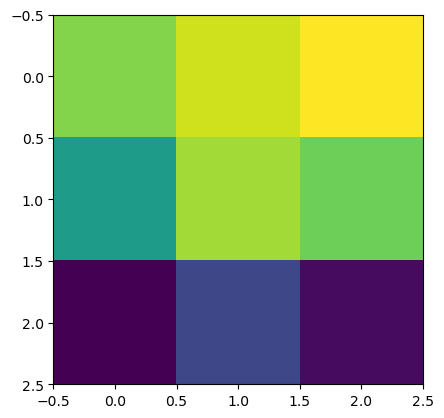

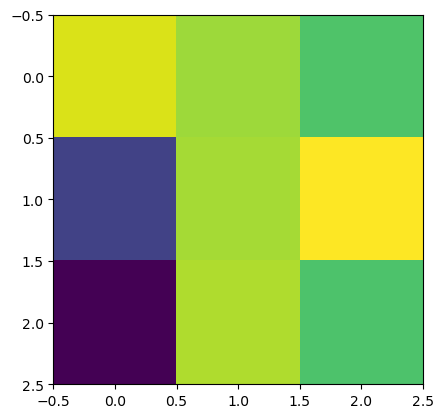

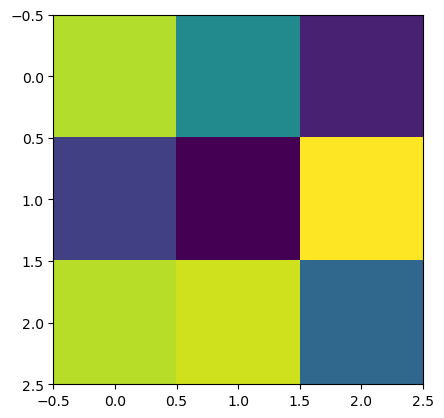

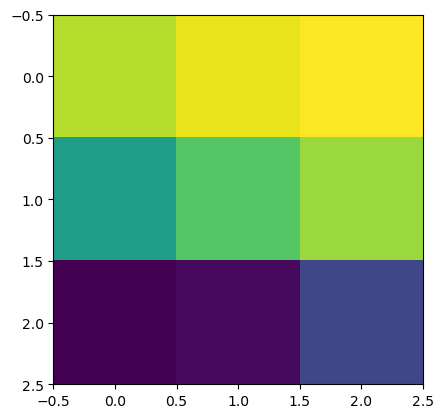

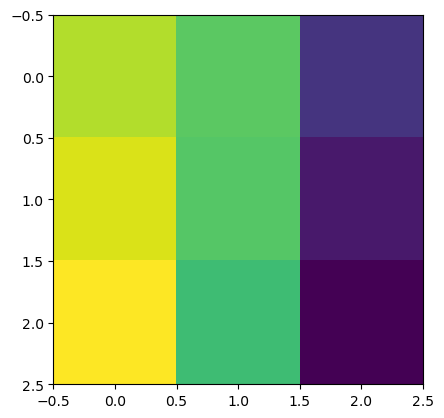

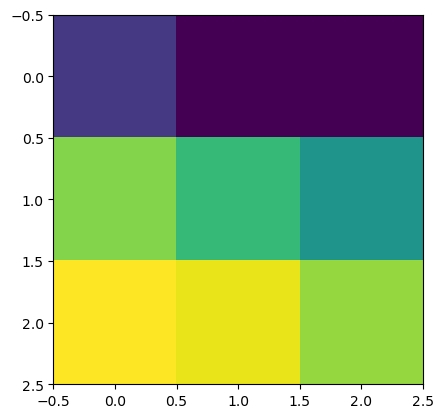

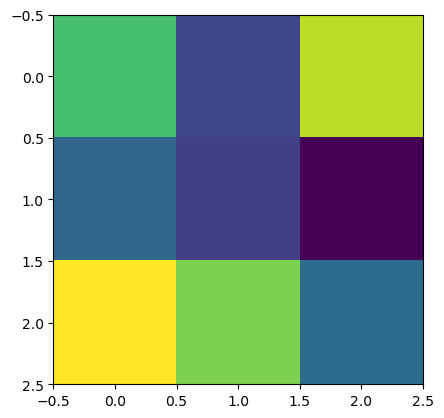

In [9]:
for layer in clasificador.layers:
    filtros = layer.get_weights()[0]
    for i in range(32):
        plt.imshow(filtros[:,:,0,i])
        plt.show()
    break




In [10]:
filtros[0].shape

(3, 1, 32)

In [11]:
def var_pos(X, desp_h, desp_v):
  X_big = np.zeros((X.shape[0],*big_shape,1))
  X_big[:,14+desp_v:14+28+desp_v,14+desp_h:14+28+desp_h] = X[:,:,:]
  return X_big

In [12]:
def var_pos(X, desp_h, desp_v):
  X_big = np.zeros(shape=(*big_shape,1))
  X_big[14+desp_v:14+28+desp_v,14+desp_h:14+28+desp_h] = X[:,:,:]
  return X_big

In [13]:
def generador():
    for x,y in zip(Xtrain,Ytrain):
        x_mov = var_pos(x,desp_h, desp_v)
        yield x_mov,y

def generador_test():
    for x,y in zip(Xtest,Ytest):
        x_mov = var_pos(x,desp_h, desp_v)
        yield x_mov,y


In [22]:
dst_train

TypeError: 'FlatMapDataset' object is not subscriptable

In [54]:
desp_h = 0
desp_v = -10

dst_train = tf.data.Dataset.from_generator(generador,
                                           output_signature=(tf.TensorSpec(shape=(*big_shape,1), dtype=tf.float32),
                                                             tf.TensorSpec(shape=(), dtype=tf.float32)))

for x,y in dst_train:
    pass

KeyboardInterrupt: 

In [15]:
y.shape

TensorShape([])

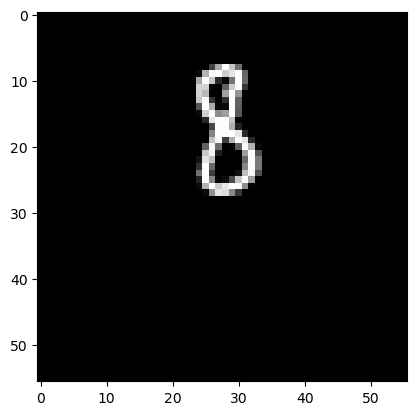

In [55]:
plt.imshow(x,cmap = "gray")
plt.show()

In [57]:
def var_pos(X, desp_h, desp_v):
  X_big = np.zeros((X.shape[0],*big_shape,1))
  X_big[:,14+desp_v:14+28+desp_v,14+desp_h:14+28+desp_h] = X[:,:,:]
  X_pos = X_big[:,14:14+28,14:14+28]
  return X_pos

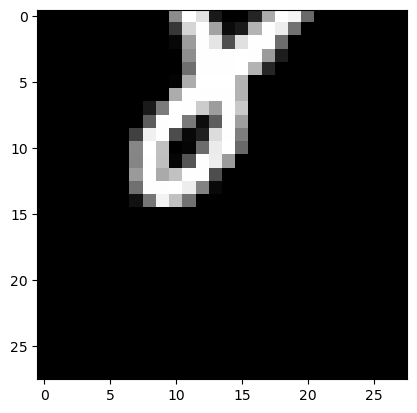

In [73]:
X_pos = var_pos(Xtrain,0,-10)
plt.imshow(X_pos[17].squeeze(), cmap = "gray")
plt.show()

In [ ]:
def out_mapas(model,X):
  capas = model.layers
  salida = [X]

  for capa in capas:
    salida_capa = capa(salida[-1]).numpy()
    salida.append(salida_capa)
  
  return salida

# MÉTRICAS


In [14]:
 
desps_h = range(-7,8)
desps_v = range(-7,8)
metricas = {}
mapas_caracteristicas = {}
 
for desp_h in tqdm(desps_h):
    for desp_v in tqdm(desps_v):
        
        dst_train_desp = tf.data.Dataset.from_generator(generador,
                                           output_signature=(tf.TensorSpec(shape=(*big_shape,1), dtype=tf.float32),
                                                             tf.TensorSpec(shape=(), dtype=tf.float32)))
        dst_test_desp = tf.data.Dataset.from_generator(generador_test,
                                           output_signature=(tf.TensorSpec(shape=(*big_shape,1), dtype=tf.float32),
                                                             tf.TensorSpec(shape=(), dtype=tf.float32)))

        met_train = clasificador.evaluate(dst_train_desp.batch(128), verbose=0, return_dict=True)
        met_test = clasificador.evaluate(dst_test_desp.batch(128), verbose=0, return_dict=True)
        metricas[(desp_h, desp_v)] = {"Train":met_train, "Test":met_test}
        break
    break
        


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [48]:
metricas

{(-7,
  -7): {'Train': {'loss': 1.8137249946594238,
   'accuracy': 0.35811665654182434}, 'Test': {'loss': 1.8081214427947998,
   'accuracy': 0.36160001158714294}}}

In [15]:
# Escribir 
# with open("metricas_traslacion_lit.pkl", "wb") as f:
#         dump(metricas, f)

# Leer
with open("metricas_traslacion_inv_basico.pkl", "rb") as f:
        metricas = load(f)


In [16]:
df_metricas = pd.DataFrame.from_dict(metricas, orient="index").reset_index()
df_metricas.columns = ["desp_h","desp_v", "Train", "Test"]
df_metricas.head()

,desp_h,desp_v,Train,Test
0,-7,-7,"{'loss': 1.8137240409851074, 'accuracy': 0.358...","{'loss': 1.8081207275390625, 'accuracy': 0.361..."
1,-7,-6,"{'loss': 1.8137240409851074, 'accuracy': 0.358...","{'loss': 1.8081207275390625, 'accuracy': 0.361..."
2,-7,-5,"{'loss': 1.8137240409851074, 'accuracy': 0.358...","{'loss': 1.8081207275390625, 'accuracy': 0.361..."
3,-7,-4,"{'loss': 1.8137240409851074, 'accuracy': 0.358...","{'loss': 1.808120846748352, 'accuracy': 0.3616..."
4,-7,-3,"{'loss': 1.8137240409851074, 'accuracy': 0.358...","{'loss': 1.808120846748352, 'accuracy': 0.3616..."


In [17]:
TrainLoss = []
TrainAccuracy = []
TestLoss = []
TestAccuracy = []

for key in metricas.keys():
    TrainLoss.append(metricas[key]["Train"]["loss"])
    TrainAccuracy.append(metricas[key]["Train"]["accuracy"])
    TestLoss.append(metricas[key]["Test"]["loss"])
    TestAccuracy.append(metricas[key]["Test"]["accuracy"])
    

In [18]:
df_metricas["TrainLoss"] = TrainLoss
df_metricas["TrainAccuracy"] = TrainAccuracy
df_metricas["TestLoss"] = TestLoss
df_metricas["TestAccuracy"] = TestAccuracy

df_metricas = df_metricas.drop("Train", axis = 1)
df_metricas = df_metricas.drop("Test", axis = 1)

In [19]:
df_metricas

,desp_h,desp_v,TrainLoss,TrainAccuracy,TestLoss,TestAccuracy
0,-7,-7,1.813724,0.358117,1.808121,0.3616
1,-7,-6,1.813724,0.358117,1.808121,0.3616
2,-7,-5,1.813724,0.358117,1.808121,0.3616
3,-7,-4,1.813724,0.358117,1.808121,0.3616
4,-7,-3,1.813724,0.358117,1.808121,0.3616
...,...,...,...,...,...,...
220,7,3,1.813724,0.358117,1.808121,0.3616
221,7,4,1.813724,0.358117,1.808121,0.3616
222,7,5,1.813724,0.358117,1.808121,0.3616
223,7,6,1.813724,0.358117,1.808121,0.3616


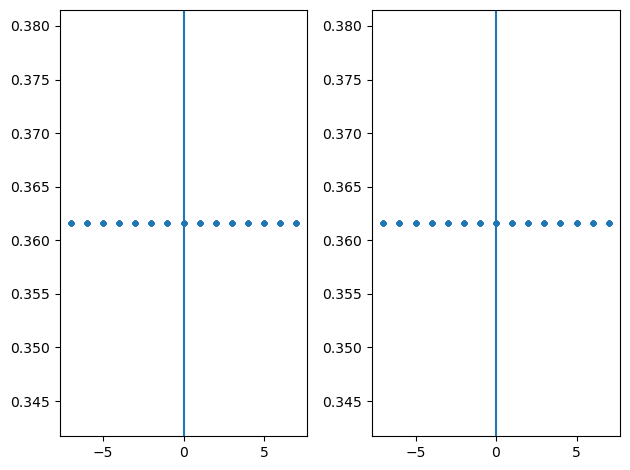

In [22]:
fig, axes = plt.subplots(1,2)
axes[0].plot(df_metricas["desp_h"], df_metricas["TestAccuracy"], '.')
axes[0].axvline(0)
axes[1].plot(df_metricas["desp_v"], df_metricas["TestAccuracy"], '.')
axes[1].axvline(0)
fig.tight_layout()
plt.show()

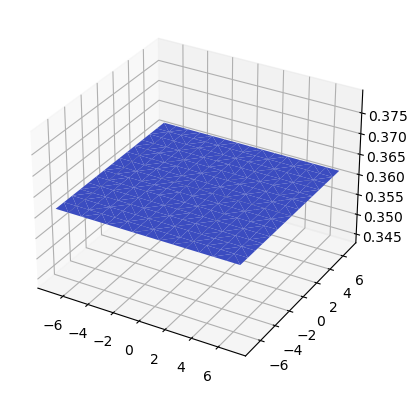

In [21]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_trisurf(df_metricas["desp_h"], df_metricas["desp_v"], df_metricas["TestAccuracy"], cmap="coolwarm")
plt.savefig("surface", dpi = 300)
plt.show()

# MAPAS DE CARACTERÍSTICAS

In [ ]:
select = np.array([0,1,2,3,4,7,8,11,18,61]) # Una imagen con cada número
Xtest_selec = Xtest[select]
Ytest_selec = Ytest[select]

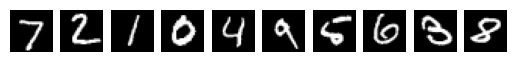

In [ ]:
fig, axes = plt.subplots(1,10,squeeze=False)
axes[0,0].set_ylabel("Xtest")
for i in range(10):
    axes[0,i].imshow(Xtest_selec[i].squeeze(), cmap="gray")
    axes[0,i].axis("off")
    

In [ ]:
mapas_caracteristicas = {}
desps_h = range(-7,8)
desps_v = range(-7,8)

for desp_h in tqdm(desps_h):
  for desp_v in tqdm(desps_v):
    Xtest_desplazado = var_pos(Xtest_selec, desp_h = desp_h, desp_v = desp_v)
    mapas_test = out_mapas(clasificador,Xtest_desplazado)
    mapas_caracteristicas[(desp_h, desp_v)] = mapas_test

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

In [ ]:
for mp in mapas_caracteristicas[(-7,-7)]: print(mp.shape)

(10, 56, 56, 1)
(10, 56, 56, 32)
(10, 32)
(10, 10)


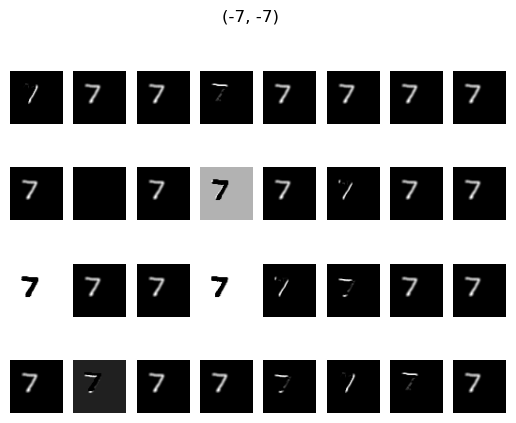

In [ ]:
for desps, outputs in mapas_caracteristicas.items():
    for image in range(len(outputs[1])):
        fig, axes = plt.subplots(4,8)
        axes = axes.flatten()
        for i in range(outputs[1][image].shape[-1]):
            axes[i].imshow(outputs[1][image,:,:,i].squeeze(), cmap="gray")
            axes[i].axis("off")
        plt.suptitle(desps)
        plt.show()
        break
    break
        
    

In [ ]:
desps_h = range(-7,8)
desps_v = range(-7,8)
dist_0 = {}
list_df = []
AllImages = {}

for image in Ytest_selec:
    for filtro in range(32):
        for desp_h in desps_h:
            for desp_v in tqdm(desps_v):
                dist = np.array(mapas_caracteristicas[0,0][1][image,:,:,filtro]) - np.array(mapas_caracteristicas[desp_h,desp_v][1][image,:,:,filtro])
                dist_0[(desp_h, desp_v)] = round(np.sum(np.abs(dist)),2)
        df = pd.DataFrame.from_dict(dist_0, orient="index")
        list_df.append(df)
    TablaCompleta = pd.concat(list_df, axis = 1)
    AllImages[image] = TablaCompleta
    break

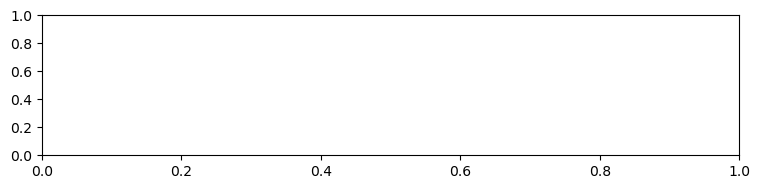

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

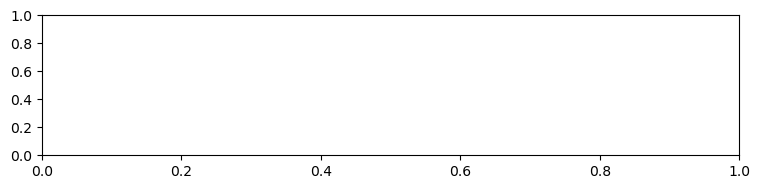

In [ ]:
plt.figure(figsize=(9,4))
plt.subplot(2,1,1)
plt.show(mapas_caracteristicas[7,7][2][1])
plt.axis("off")
plt.subplot(2,1,2)
plt.show(mapas_caracteristicas[0,0][2][1])
plt.axis("off")
plt.show()

In [ ]:
# plt.figure(figsize=(9,4))
# plt.subplot(2,1,1)
# plt.matshow(np.repeat(mapas_caracteristicas[7,7][2][1], 50, axis=0), fignum=0)
# plt.axis("off")
# plt.subplot(2,1,2)
# plt.matshow(np.repeat(mapas_caracteristicas[0,0][2][1], 50, axis=0), fignum=0)
# plt.axis("off")
# plt.show()